<a href="https://colab.research.google.com/github/dion21001/Materi-Pandas/blob/main/analisa%20data%20pneumonia%20jawa%20barat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mengimport beberapa library data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

**menginput data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


sumber data :https://opendata.jabarprov.go.id/id/hasil-pencarian?topic=2&by=dataset&currentpage=3 (Open data jawa barat)

In [ ]:
data =pd.read_excel("/content/drive/My Drive/colab/penyakit.xlsx")
data.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_penyakit,jumlah_kasus,satuan,tahun
0,7,32,JAWA BARAT,3201,KABUPATEN BOGOR,DIARE,83940,KASUS,2019
1,25,32,JAWA BARAT,3203,KABUPATEN CIANJUR,DIARE,62517,KASUS,2019
2,43,32,JAWA BARAT,3205,KABUPATEN GARUT,DIARE,60559,KASUS,2019
3,187,32,JAWA BARAT,3273,KOTA BANDUNG,DIARE,59511,KASUS,2019
4,133,32,JAWA BARAT,3215,KABUPATEN KARAWANG,DIARE,57682,KASUS,2019


In [ ]:
data["jenis_penyakit"].unique()

array(['DIARE', 'PNEUMONIA', 'TB TUBERCOLOSIS', 'DBD', 'CAMPAK', 'KUSTA',
       'AIDS ', 'MALARIA', 'TETANUS'], dtype=object)

<Axes: xlabel='jenis_penyakit'>

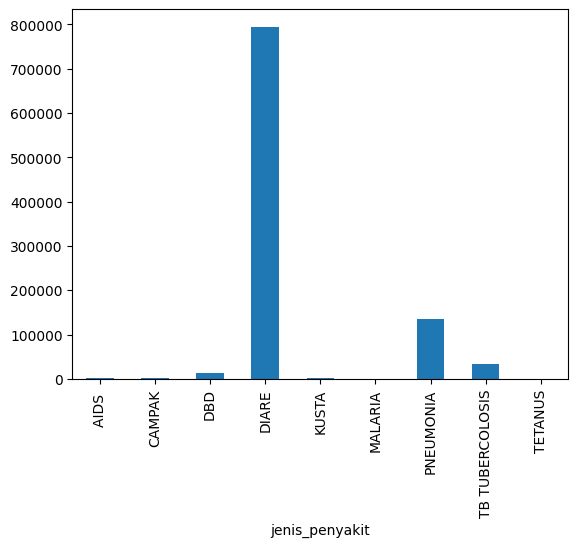

In [ ]:
data.groupby(["jenis_penyakit"])["jumlah_kasus"].sum().plot(kind ="bar")


Diare menjadi penyakit yang cukup banyak dialami oleh warga masyarat jawa barat sepanjang 2019 secara kumulatif lalu yang kedua yaitu ada pneumonia , pneumonia menjadi penyakit yang cukup ditakutkan dan sebaiknya bisa dihindari ,melansir dari situs news republika setidaknya ada 114.753 kasus pneumonia balita yang terjadi sepanjang tahun 2020 sehingga sangat penting bagi kita mengenal hal-hal apa saja yang berpoteni menjadi penyebab penyakit ini dan menguranginya

In [ ]:
data.drop_duplicates()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_penyakit,jumlah_kasus,satuan,tahun
0,7,32,JAWA BARAT,3201,KABUPATEN BOGOR,DIARE,83940,KASUS,2019
1,25,32,JAWA BARAT,3203,KABUPATEN CIANJUR,DIARE,62517,KASUS,2019
2,43,32,JAWA BARAT,3205,KABUPATEN GARUT,DIARE,60559,KASUS,2019
3,187,32,JAWA BARAT,3273,KOTA BANDUNG,DIARE,59511,KASUS,2019
4,133,32,JAWA BARAT,3215,KABUPATEN KARAWANG,DIARE,57682,KASUS,2019
...,...,...,...,...,...,...,...,...,...
238,230,32,JAWA BARAT,3278,KOTA TASIKMALAYA,TETANUS,0,KASUS,2019
239,231,32,JAWA BARAT,3278,KOTA TASIKMALAYA,CAMPAK,0,KASUS,2019
240,235,32,JAWA BARAT,3279,KOTA BANJAR,MALARIA,0,KASUS,2019
241,239,32,JAWA BARAT,3279,KOTA BANJAR,TETANUS,0,KASUS,2019


In [ ]:
data.isnull().sum()

id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
jenis_penyakit         0
jumlah_kasus           0
satuan                 0
tahun                  0
dtype: int64

## mengambilan data penyakit pneumonia tahun 2019

In [ ]:
data_pneumonia =data[data["jenis_penyakit"]==("PNEUMONIA")]
data_pneumonia.reset_index().drop(columns ="index").head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_penyakit,jumlah_kasus,satuan,tahun
0,75,32,JAWA BARAT,3209,KABUPATEN CIREBON,PNEUMONIA,11281,KASUS,2019
1,30,32,JAWA BARAT,3204,KABUPATEN BANDUNG,PNEUMONIA,11246,KASUS,2019
2,183,32,JAWA BARAT,3273,KOTA BANDUNG,PNEUMONIA,10525,KASUS,2019
3,12,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,PNEUMONIA,9965,KASUS,2019
4,102,32,JAWA BARAT,3212,KABUPATEN INDRAMAYU,PNEUMONIA,8127,KASUS,2019


Data dibawah ini menunjukkan bahwa tidak ada kabupaten yang warganya tidak mengalami penyakit pneumonia sepanjang tahun

<Axes: title={'center': 'Perbandingkan banyak kasus Pneumonia setiap kabupaten'}, xlabel='jumlah_kasus', ylabel='nama_kabupaten_kota'>

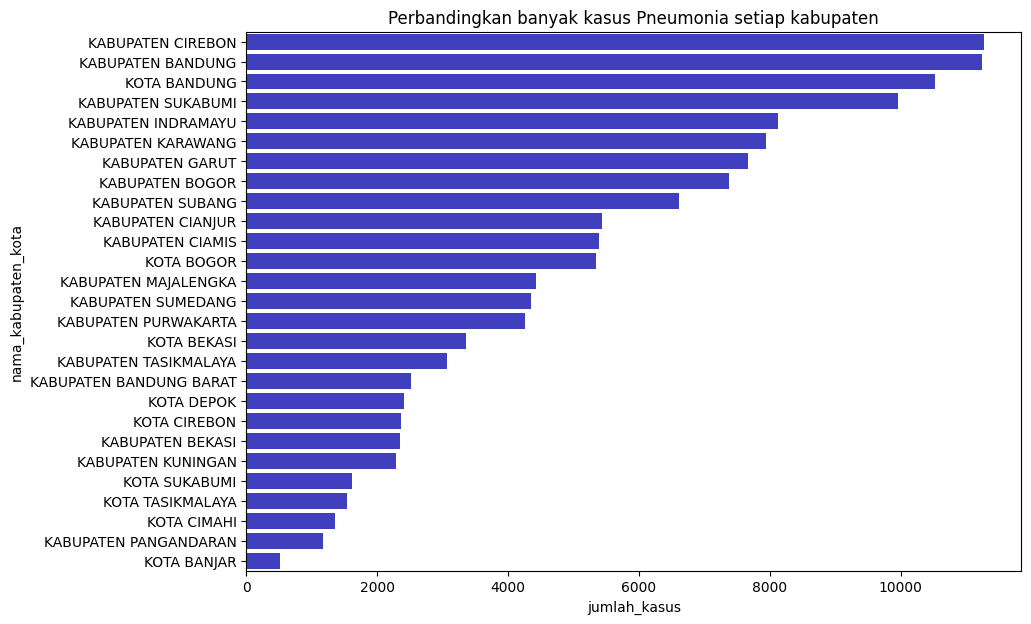

In [ ]:
plt.figure(figsize =(10,7))
plt.title("Perbandingkan banyak kasus Pneumonia setiap kabupaten")
sns.barplot(data =data_pneumonia,x ="jumlah_kasus",y ="nama_kabupaten_kota",color ="b",saturation=0.5)

In [ ]:
data_pneumonia_perbandingan =data_pneumonia.copy()
data_pneumonia_perbandingan["nama_kabupaten_kota"] =data_pneumonia_perbandingan["nama_kabupaten_kota"].str.replace("KABUPATEN"," ").str.strip()
data_pneumonia_perbandingan["nama_kabupaten_kota"] =data_pneumonia_perbandingan["nama_kabupaten_kota"].str.lower()
data_kabupaten_kota =data_pneumonia_perbandingan[["nama_kabupaten_kota","jumlah_kasus"]]

Penentuan beberapa parameter inputan yang bisa diselidiki untuk sebagai parameter penentuan mengapa kasus **PNEUMONIA** menjadi kasus penyakit yang besar dijawa barat

**menurut situs alodokter pneumonia adalah** *Pneumonia adalah peradangan paru-paru yang disebabkan oleh infeksi. Pneumonia bisa menimbulkan gejala yang ringan hingga berat. Beberapa gejala yang umum dialami penderita pneumonia adalah batuk berdahak, demam, dan sesak napas*

menurut alodokter juga ada beberapa beberapa hal yang menyebabkan penyakit PNEUMONIA diantaranya :
- bakteri, virus, dan jamur. mulai dari virus
- virus influenza, respiratory syncytial virus (RSV), dan SARS-CoV-2. Sementara jenis bakteri yang umum menyebabkan pneumonia adalah Streptococcus pneumonia.

dalam data diatas terlihat bahwa bogor menjadi daerah dengan tingkat penyakit pneumonia terbesar di jawa barat pertahun 2019 dan majalengka dengan kasus terendah ,jika kita melihat data jumlah penduduk di jawa barat tiap kabupatennya

In [ ]:
data_penduduk = pd.read_excel("/content/drive/My Drive/colab/penduduk.xlsx")
data_penduduk

,nama_kabupaten_kota,2018,2019,2020
0,Bogor,5840907,5965410,6088233
1,Sukabumi,2460693,2466272,2470219
2,Cianjur,2260620,2263072,2264328
3,Bandung,3717291,3775279,3831505
4,Garut,2606399,2622425,2636637
5,Tasikmalaya,1751295,1754128,1755710
6,Ciamis,1188629,1195176,1201685
7,Kuningan,1074497,1080804,1087105
8,Cirebon,2176213,2192903,2209633
9,Majalengka,1199300,1205034,1210709


In [ ]:
data_penduduk_perbandingan =data_penduduk[["nama_kabupaten_kota","2019"]].copy()
data_penduduk_perbandingan["nama_kabupaten_kota"] = data_penduduk_perbandingan["nama_kabupaten_kota"].str.lower()
data_penduduk_perbandingan

,nama_kabupaten_kota,2019
0,bogor,5965410
1,sukabumi,2466272
2,cianjur,2263072
3,bandung,3775279
4,garut,2622425
5,tasikmalaya,1754128
6,ciamis,1195176
7,kuningan,1080804
8,cirebon,2192903
9,majalengka,1205034


<Axes: title={'center': 'Banyaknya warna tiap Kabupaten'}, xlabel='2019', ylabel='nama_kabupaten_kota'>

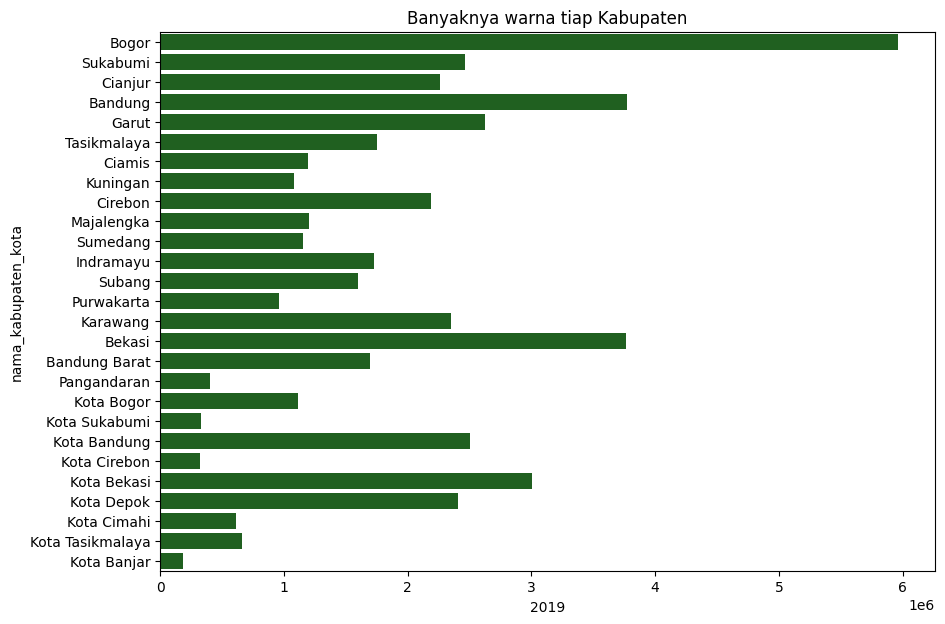

In [ ]:
plt.figure(figsize =(10,7))
plt.title("Banyaknya warna tiap Kabupaten")
sns.barplot(data =data_penduduk,x ="2019",y ="nama_kabupaten_kota",color ="green",saturation=0.5)


maka dari itu penting bagi kita untuk mengetahui parameter parameter apa saja yang membuat kasus pneumonia di jawa barat menjadi sangat besar

ada beberapa parameter yang bisa kita gunakan untuk dijadikan parameter inputan atau data bebas nya yaitu :

- Pengaaruh politik : Kebijakan pemerintah terkait dengan kesehatan masyarakat , dukungan kebijakan
untuk mengurangi penyakit diabetes di kabupaten-kabupaten di jawa barat, parameter yang bisa kita gunakan
untuk melihat kebijakan pemerintah jawa barat ini bisa berupa Anggaran Kesehatan ,program promosi kesehatan

-  Faktor Ekonomi : Faktor -faktor ekonomi seperti tingkat penghasilan,tingkat pengangguran,aksesibilitas layanan
kesehatan, dan harga makanan

- Pengaruh sosial : faktor sosial seperti pendidikan ,kesadaran tentang kesehatan, budaya makanan,dukungan keluarga
dan dukungan sosial

- Pengaruh Teknologi : kemajuan teknologi kesehatan seperti alat pemantauan gula darah, aplikasi kesehatan dan telemedicine

- Pengaruh Lingkugan : Lingkugan fisik dan lingkungan sosial juga dapat berdampak pada resiko diabetes .Misalnya aksebilitas dan
fasilitas olahraga

dan masih banyak lagi hal hal yang perlu kita teliti tentang bagaimana penyebaran penyakit diabetes di daerah jawa barat , seperti

- man :jumlah tenaga kesehatan di jawa barat
- material : jumlah ketersediaan obat obatan
- money : ketersediaan anggaran yang berhubungan dengan kesehatan kalau bisa ada data yang khusus ke penyakit diabets

tetapi data yang bisa dimuat atau didapatkan cukup terbatas sehingga kami hanya akan membuat parameter yang bisa kami dapatkan

In [ ]:
data_penduduk_perbandingan =data_penduduk_perbandingan.rename(columns ={"2019":"jumlah_penduduk_2019"})
data_penduduk_perbandingan.head()

,nama_kabupaten_kota,jumlah_penduduk_2019
0,bogor,5965410
1,sukabumi,2466272
2,cianjur,2263072
3,bandung,3775279
4,garut,2622425


<Axes: xlabel='perbandingan', ylabel='nama_kabupaten_kota'>

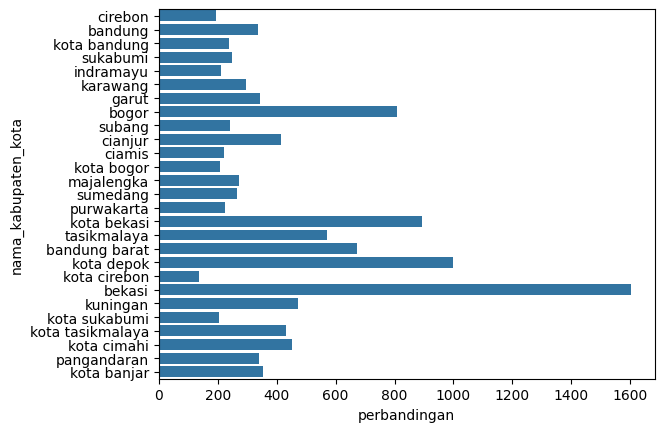

In [ ]:
data =data_kabupaten_kota.merge(data_penduduk_perbandingan,how ="inner",on ="nama_kabupaten_kota")
data["perbandingan"] =data["jumlah_penduduk_2019"]/data["jumlah_kasus"]
sns.barplot(y =data["nama_kabupaten_kota"],x =data["perbandingan"].sort_values())


# **1.Persiapan Data Yang Dibutuhkan**

**1.1 Data Target**

In [ ]:
data_penyakit =pd.read_excel("/content/drive/My Drive/colab/penyakit.xlsx")
data_penyakit.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_penyakit,jumlah_kasus,satuan,tahun
0,7,32,JAWA BARAT,3201,KABUPATEN BOGOR,DIARE,83940,KASUS,2019
1,25,32,JAWA BARAT,3203,KABUPATEN CIANJUR,DIARE,62517,KASUS,2019
2,43,32,JAWA BARAT,3205,KABUPATEN GARUT,DIARE,60559,KASUS,2019
3,187,32,JAWA BARAT,3273,KOTA BANDUNG,DIARE,59511,KASUS,2019
4,133,32,JAWA BARAT,3215,KABUPATEN KARAWANG,DIARE,57682,KASUS,2019


**1.2 Data inputan/Data Feature**

- **Data industri di jawa barat**

In [ ]:
import pandas as pd
data_industri =pd.read_excel("/content/drive/My Drive/colab/industri.xlsx")
data_industri.head()


,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_unit,satuan,tahun
0,109,32,JAWA BARAT,3201,KABUPATEN BOGOR,16049,UNIT,2019
1,110,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,16166,UNIT,2019
2,111,32,JAWA BARAT,3203,KABUPATEN CIANJUR,1346,UNIT,2019
3,112,32,JAWA BARAT,3204,KABUPATEN BANDUNG,14233,UNIT,2019
4,113,32,JAWA BARAT,3205,KABUPATEN GARUT,10000,UNIT,2019


- **Data jumlah posyandu di jawa barat**

In [ ]:
data_posyandu =pd.read_excel("/content/drive/My Drive/colab/posyandu.xlsx")
data_posyandu.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_posyandu_aktif,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,2529,UNIT,2019
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,0,UNIT,2019
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,78,UNIT,2019
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,4234,UNIT,2019
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,2562,UNIT,2019


- **Data jumlah rumah sakit di jawa Barat**

In [ ]:
data_rumah_sakit =pd.read_excel("/content/drive/My Drive/colab/rumah_sakit.xlsx")
data_rumah_sakit.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_rs,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,21.0,UNIT,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,8.0,UNIT,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,3.0,UNIT,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,9.0,UNIT,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,6.0,UNIT,2016


- **Data jumlah tenaga_kesehatan di jawa Barat**

In [ ]:
data_tenaga_kesehatan =pd.read_excel("/content/drive/My Drive/colab/tenaga_kesehatan.xlsx")
data_tenaga_kesehatan.head()
data_tenaga_kesehatan.drop(0,inplace =True)
data_tenaga_kesehatan


,nama_kabupaten_kota,Dokter,Perawat,Bidan
1,Bogor,399,1447,510
2,Sukabumi,283,680,496
3,Cianjur,323,966,806
4,Bandung,660,1621,1308
5,Garut,129,886,564
6,Tasikmalaya,381,1390,1243
7,Ciamis,231,1405,1152
8,Kuningan,301,1904,1299
9,Cirebon,195,1111,774
10,Majalengka,622,2212,1415


- **Data jumlah Anggaran_Dinkes di jawa Barat**

In [ ]:
data_pendapatan=pd.read_excel("/content/drive/My Drive/colab/pendapatan.xlsx")
data_pendapatan.head()

,nama_kabupaten_kota,2018,2019,2020
0,Bogor,25373345.99,26296550.30,25310591.99
1,Sukabumi,17935085.48,18922738.58,18702513.57
2,Cianjur,13411219.92,14128884.21,14039069.25
3,Bandung,20877714.63,21809416.71,21095968.71
4,Garut,14281947.98,14907060.03,14639157.88


## Data Luas Daerah

In [ ]:
luas_daerah =pd.read_excel("/content/Luas Daerah.xlsx")
luas_daerah.head()

,Kabupaten/Kota,Luas Daerah (km2),Unnamed: 2,Unnamed: 3
0,NaN,2019.00,2021.00,2022.00
1,Bogor,2710.62,2710.62,2710.62
2,Sukabumi,4145.70,4145.70,4145.70
3,Cianjur,3840.16,3840.16,3840.16
4,Bandung,1767.96,1767.96,1767.96


In [ ]:
luas_daerah =luas_daerah.iloc[1:28,0:2]
luas_daerah.head()

,Kabupaten/Kota,Luas Daerah (km2)
1,Bogor,2710.62
2,Sukabumi,4145.70
3,Cianjur,3840.16
4,Bandung,1767.96
5,Garut,3074.07


## Data Upah perkepala rumah tangga


In [ ]:
data_upah =pd.read_csv("/content/upah.csv")
data_upah =data_upah[data_upah["tahun"]==2019]
data_upah =data_upah[["nama_kabupaten_kota","besaran_upah_minimum"]].reset_index()
data_upah.head()

,index,nama_kabupaten_kota,besaran_upah_minimum
0,54,KABUPATEN BOGOR,3763405.88
1,55,KABUPATEN SUKABUMI,2791016.23
2,56,KABUPATEN CIANJUR,2336004.97
3,57,KABUPATEN BANDUNG,2893074.71
4,58,KABUPATEN GARUT,1807285.69


In [ ]:
data =data_industri[["kode_kabupaten_kota","nama_kabupaten_kota","jumlah_unit"]].merge(data_posyandu[["kode_kabupaten_kota","nama_kabupaten_kota","jumlah_posyandu_aktif"]],how ="left",on ="kode_kabupaten_kota")
data["Rumah_sakit"] =data_rumah_sakit["jumlah_rs"]
data[["Dokter","Perawat","Bidan"]] =data_tenaga_kesehatan[["Dokter","Perawat","Bidan"]]
data["pendapatan"] =data_pendapatan["2019"]
data["kasus"] =data_penyakit["jumlah_kasus"]
data["Luas_daerah"] =luas_daerah["Luas Daerah (km2)"]
data["pendapatan_penduduk"] =data_upah["besaran_upah_minimum"]
data.fillna(method='bfill', inplace=True)
data.drop(columns =["nama_kabupaten_kota_x","pendapatan"],inplace =True)
data =data.rename(columns ={"nama_kabupaten_kota_y":"nama_kabupaten_kota","jumlah_unit":"jumlah_unit_industri"})
data.head()

,kode_kabupaten_kota,jumlah_unit_industri,nama_kabupaten_kota,jumlah_posyandu_aktif,Rumah_sakit,Dokter,Perawat,Bidan,kasus,Luas_daerah,pendapatan_penduduk
0,3201,16049,KABUPATEN BOGOR,2529,21.0,399.0,1447.0,510.0,83940,2710.62,3763405.88
1,3202,16166,KABUPATEN SUKABUMI,0,8.0,399.0,1447.0,510.0,62517,2710.62,2791016.23
2,3203,1346,KABUPATEN CIANJUR,78,3.0,283.0,680.0,496.0,60559,4145.70,2336004.97
3,3204,14233,KABUPATEN BANDUNG,4234,9.0,323.0,966.0,806.0,59511,3840.16,2893074.71
4,3205,10000,KABUPATEN GARUT,2562,6.0,660.0,1621.0,1308.0,57682,1767.96,1807285.69


In [ ]:
pd.DataFrame({"Faktor Penyebab":data.drop(columns =["kode_kabupaten_kota","nama_kabupaten_kota","kasus"]).columns})

,Faktor Penyebab
0,jumlah_unit_industri
1,jumlah_posyandu_aktif
2,Rumah_sakit
3,Dokter
4,Perawat
5,Bidan
6,Luas_daerah
7,pendapatan_penduduk


**Memeriksa data set**

In [ ]:
data.isnull().sum()

kode_kabupaten_kota      0
jumlah_unit_industri     0
nama_kabupaten_kota      0
jumlah_posyandu_aktif    0
Rumah_sakit              0
Dokter                   0
Perawat                  0
Bidan                    0
kasus                    0
Luas_daerah              0
pendapatan_penduduk      0
dtype: int64

## Analisa Bidan-Banyak warga-kasus

<ipython-input-113-0299a4aec2e6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data["nama_kabupaten_kota"], x=data["kasus"],palette ="Blues_r", ax=axes[1])


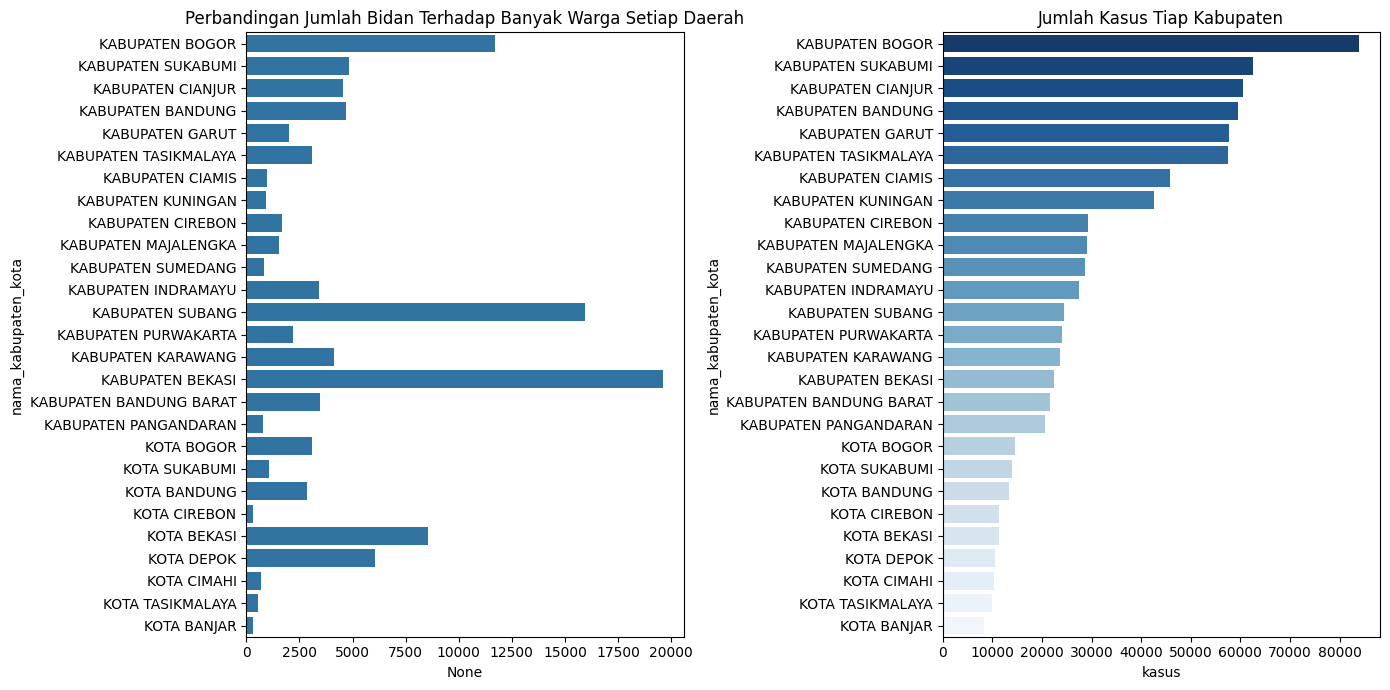

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

# Plot pertama: Perbandingan Jumlah Bidan Terhadap banyak Warga setiap daerah
axes[0].set_title("Perbandingan Jumlah Bidan Terhadap Banyak Warga Setiap Daerah")
sns.barplot(y=data["nama_kabupaten_kota"], x=data_penduduk_perbandingan["jumlah_penduduk_2019"] / data["Bidan"], ax=axes[0])

# Plot kedua: Jumlah kasus tiap kabupaten
axes[1].set_title("Jumlah Kasus Tiap Kabupaten")
sns.barplot(y=data["nama_kabupaten_kota"], x=data["kasus"],palette ="Blues_r", ax=axes[1])

# Menampilkan plot
plt.tight_layout()
plt.show()

## Posyandu per luas daerah vs jumlah kasus

<ipython-input-114-ae645faf78d9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data["nama_kabupaten_kota"], x=data["kasus"], ax=axes[1],palette ="BrBG",color="yellow")


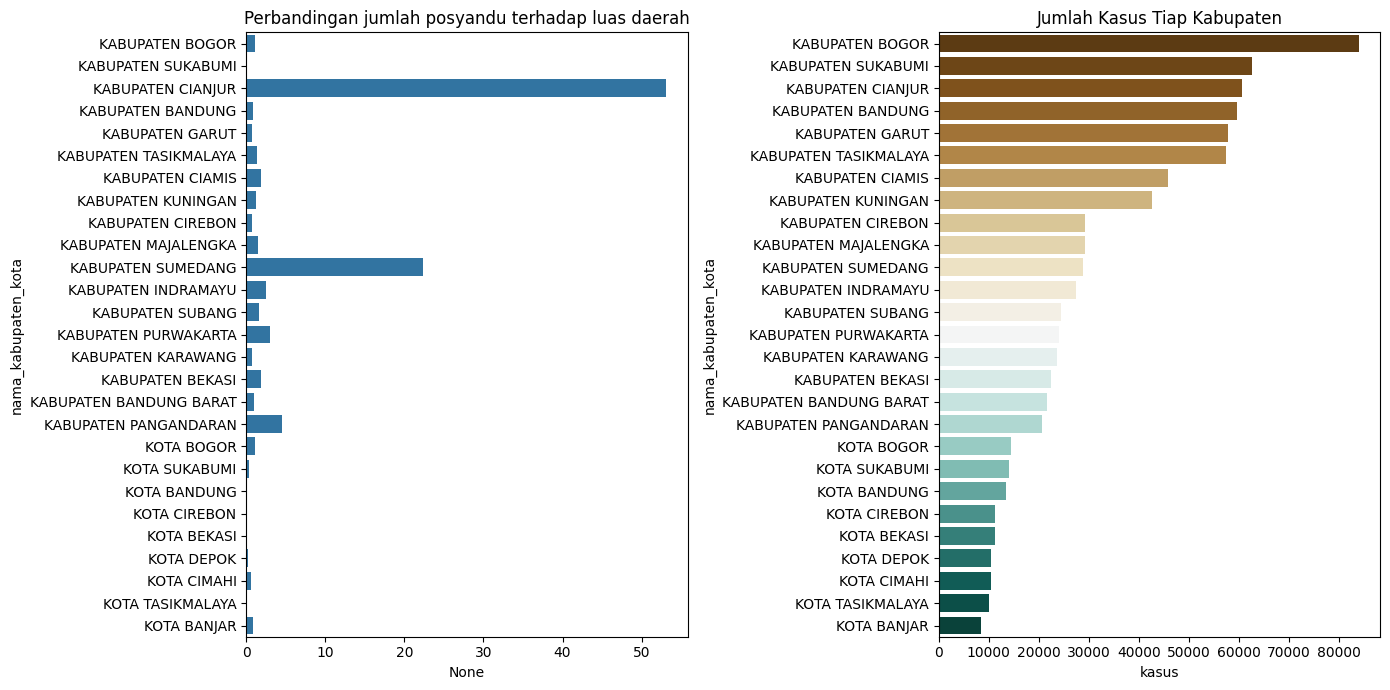

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

# Plot pertama: Perbandingan Jumlah Bidan Terhadap banyak Warga setiap daerah
axes[0].set_title("Perbandingan jumlah posyandu terhadap luas daerah")
sns.barplot(y=data["nama_kabupaten_kota"], x=data["Luas_daerah"] / data["jumlah_posyandu_aktif"], ax=axes[0])

# Plot kedua: Jumlah kasus tiap kabupaten
axes[1].set_title("Jumlah Kasus Tiap Kabupaten")
sns.barplot(y=data["nama_kabupaten_kota"], x=data["kasus"], ax=axes[1],palette ="BrBG",color="yellow")

# Menampilkan plot
plt.tight_layout()
plt.show()

<ipython-input-115-6f1de97f4bfa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data["nama_kabupaten_kota"], x=data["pendapatan_penduduk"],palette ="BuGn",ax=axes[0])


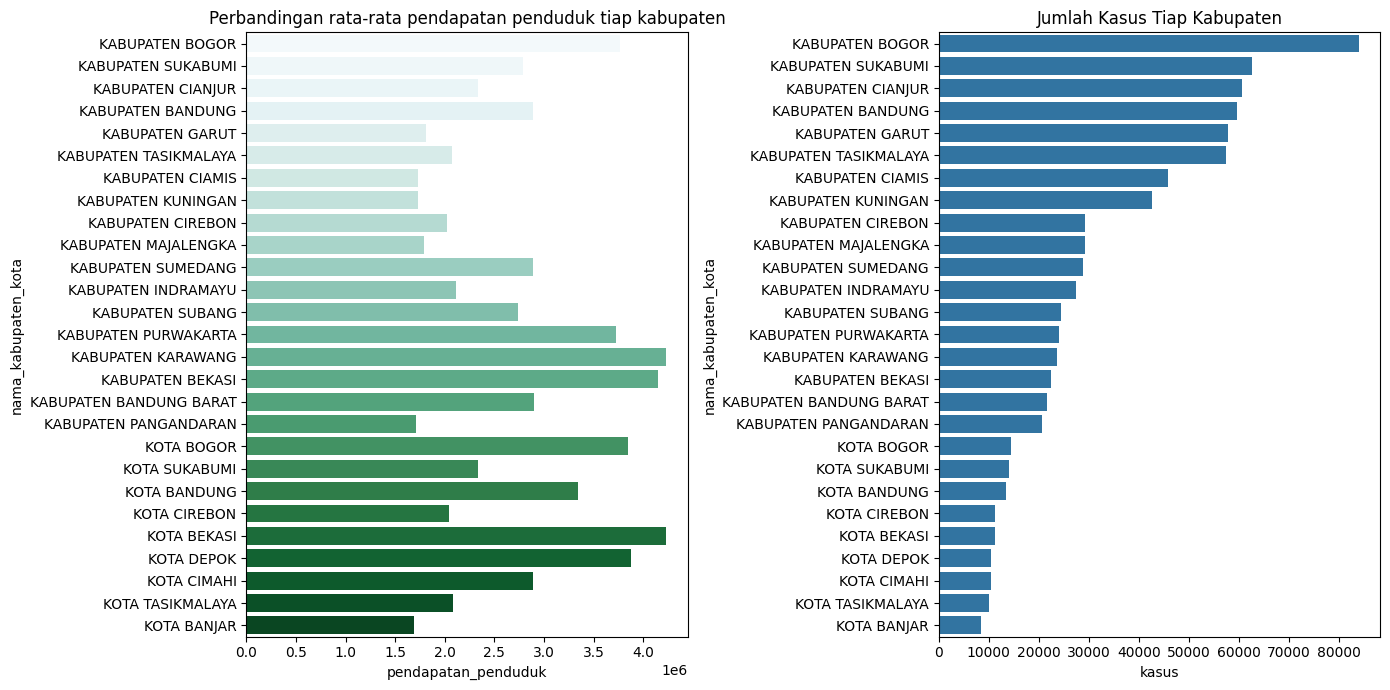

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

# Plot pertama: Perbandingan Jumlah Bidan Terhadap banyak Warga setiap daerah
axes[0].set_title("Perbandingan rata-rata pendapatan penduduk tiap kabupaten")
sns.barplot(y=data["nama_kabupaten_kota"], x=data["pendapatan_penduduk"],palette ="BuGn",ax=axes[0])

# Plot kedua: Jumlah kasus tiap kabupaten
axes[1].set_title("Jumlah Kasus Tiap Kabupaten")
sns.barplot(y=data["nama_kabupaten_kota"], x=data["kasus"], ax=axes[1])

# Menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
numerical_features = data.describe().columns

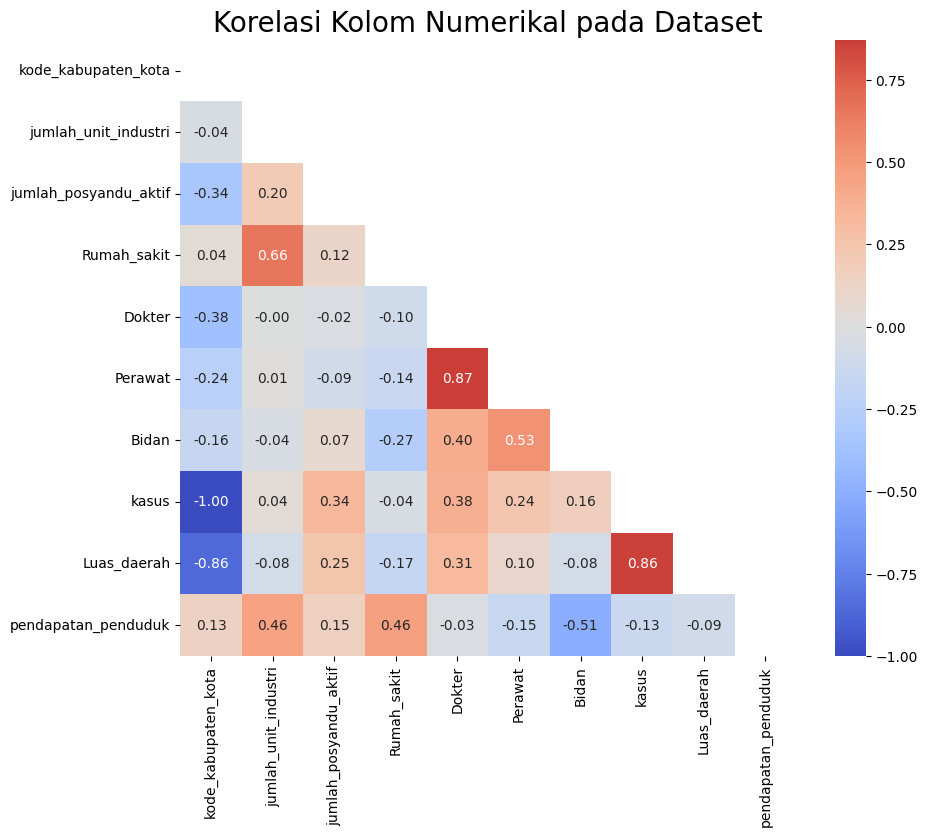

In [ ]:
plt.figure(figsize=(10,8))

matrix = np.triu(data[numerical_features].corr(method='spearman'))

sns.heatmap(data=data[numerical_features].corr(method='spearman'), annot=True, fmt='.2f', cmap='coolwarm', center=0, mask = matrix, square='True')
plt.title('Korelasi Kolom Numerikal pada Dataset',size=20)
plt.show()

<Figure size 2000x1500 with 0 Axes>

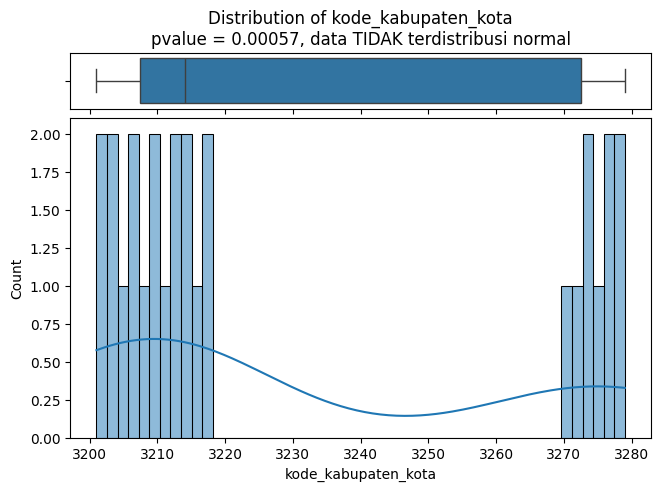

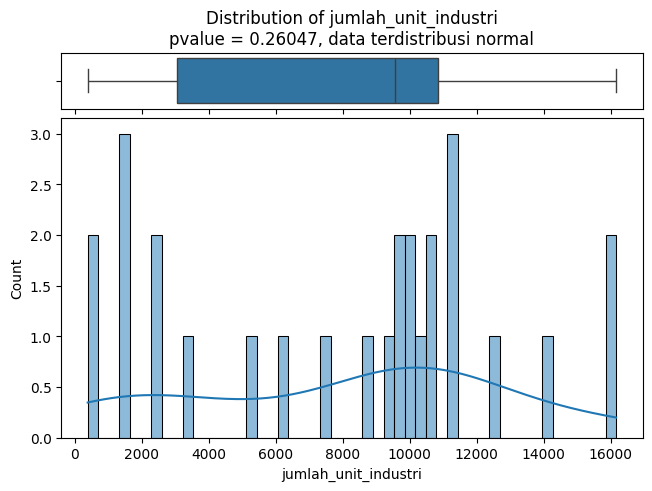

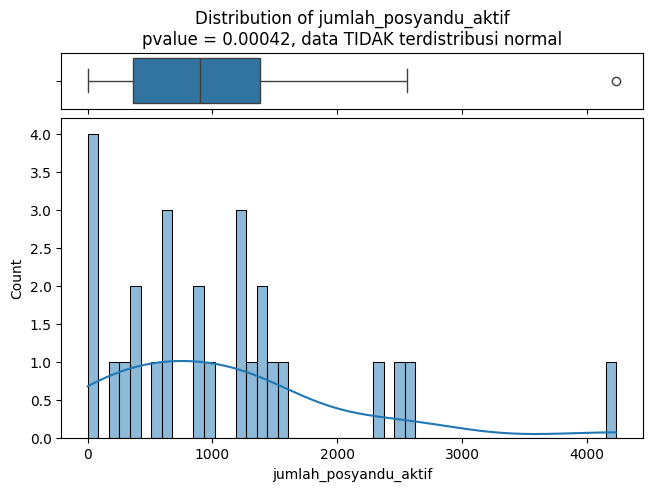

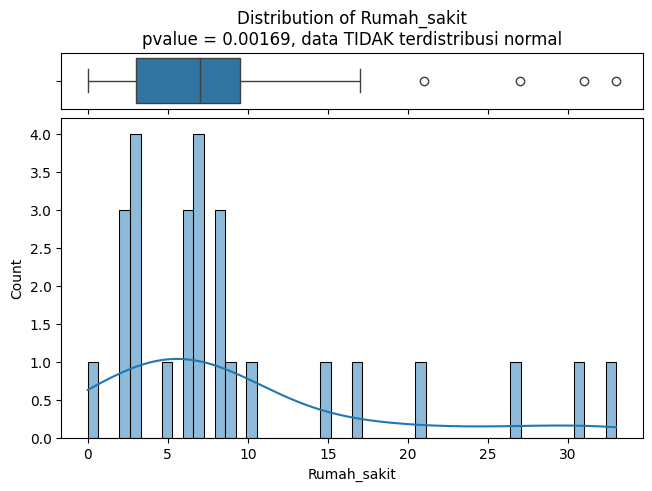

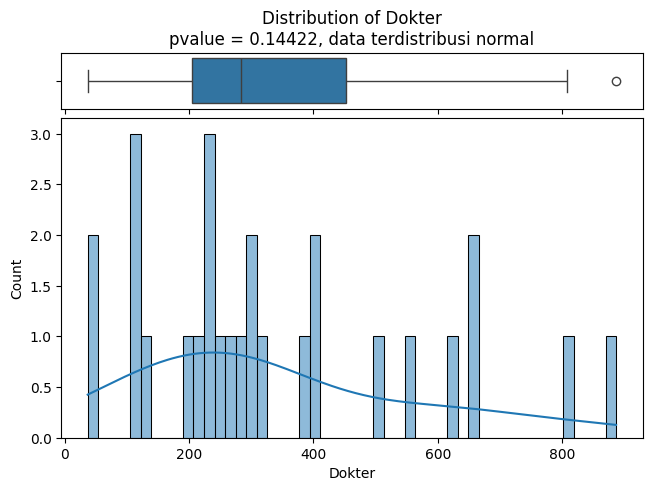

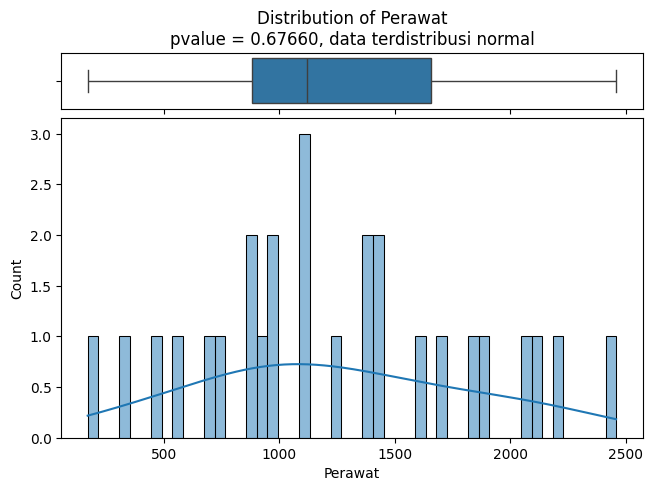

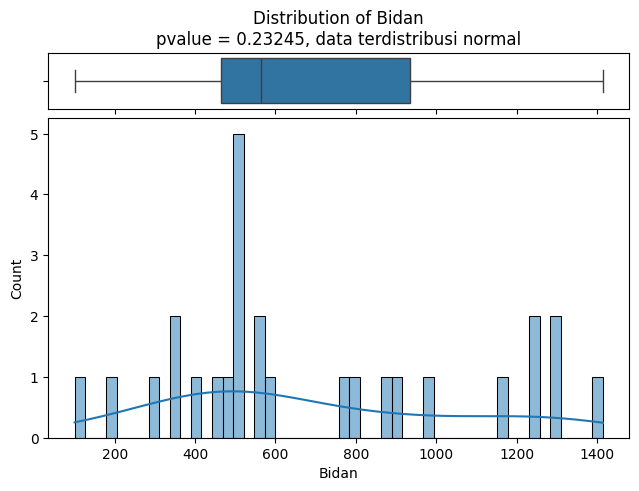

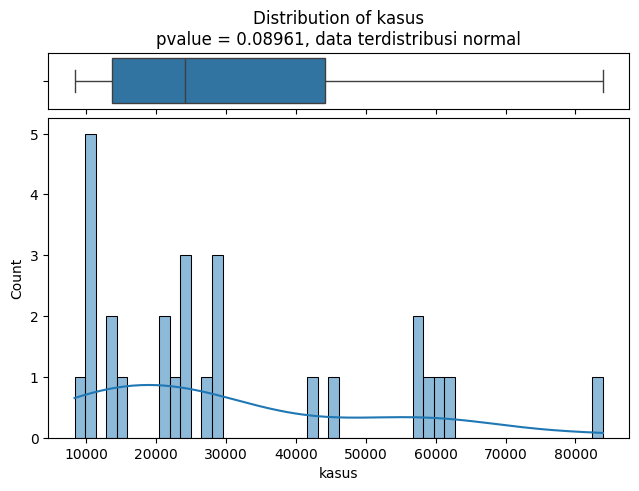

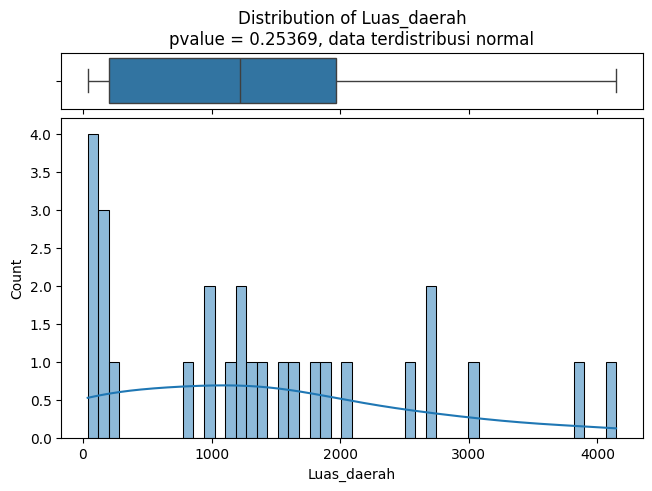

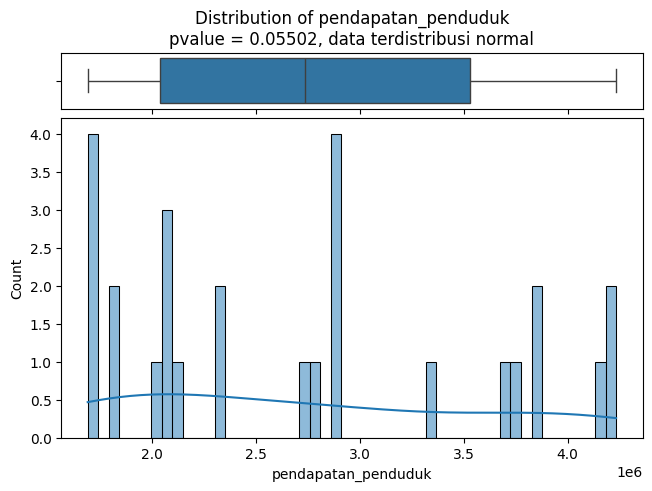

In [ ]:
# Plot distribusi data numerikal pada dataset, beserta uji hipotesa dengan menggunakan normaltest
from scipy.stats import normaltest, mannwhitneyu, chi2_contingency
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
for kolom in numerical_features:

    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5),
                                    gridspec_kw={"height_ratios": (.15, .85),
                                                "hspace": 0.05})

    stat, pvalue = normaltest(data[kolom].dropna())

    if pvalue > 0.05 :
        distribusi = f'pvalue = {pvalue:.5f}, data terdistribusi normal'
    else :
        distribusi = f'pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal'

    ax1.set_title(f"Distribution of {kolom}\n{distribusi}", color = "black")
    sns.boxplot(x = data[kolom], ax = ax1)
    ax1.set(xlabel = "")

    sns.histplot(data = data[kolom], ax = ax2, stat = "count", kde=True, bins=50)

    plt.show()

In [ ]:
data_model =data.drop(columns ="kode_kabupaten_kota")
data_model.head()

,jumlah_unit_industri,nama_kabupaten_kota,jumlah_posyandu_aktif,Rumah_sakit,Dokter,Perawat,Bidan,kasus,Luas_daerah,pendapatan_penduduk
0,16049,KABUPATEN BOGOR,2529,21.0,399.0,1447.0,510.0,83940,2710.62,3763405.88
1,16166,KABUPATEN SUKABUMI,0,8.0,399.0,1447.0,510.0,62517,2710.62,2791016.23
2,1346,KABUPATEN CIANJUR,78,3.0,283.0,680.0,496.0,60559,4145.70,2336004.97
3,14233,KABUPATEN BANDUNG,4234,9.0,323.0,966.0,806.0,59511,3840.16,2893074.71
4,10000,KABUPATEN GARUT,2562,6.0,660.0,1621.0,1308.0,57682,1767.96,1807285.69


In [ ]:
numerical_features =data_model.describe().columns


In [ ]:
list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features:
    IQR = data_model[feature].quantile(0.75) - data_model[feature].quantile(0.25)
    lower_fence = data_model[feature].quantile(0.25) - 1.5*IQR
    upper_fence = data_model[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(data_model[data_model[feature]<lower_fence]))
    number_inside.append(len(data_model[(data_model[feature]>=lower_fence) & (data_model[feature]<=upper_fence)]))
    number_upper.append(len(data_model[data_model[feature]>upper_fence]))
    percentage_outlier.append(round((len(data_model[data_model[feature]<lower_fence]) + len(data_model[data_model[feature]>upper_fence])) / len(data_model)  *100, 2))

outliers = pd.DataFrame({
    'Kolom' : numerical_features,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

,Kolom,Lower,Upper,# Lower,# Inside,# Upper,% Outlier
0,jumlah_unit_industri,-8619.000,22513.000,0,27,0,0.00
1,jumlah_posyandu_aktif,-1155.750,2898.250,0,26,1,3.70
2,Rumah_sakit,-6.750,19.250,0,23,4,14.81
3,Dokter,-165.750,824.250,0,26,1,3.70
4,Perawat,-283.500,2824.500,0,27,0,0.00
5,Bidan,-237.250,1636.750,0,27,0,0.00
6,kasus,-31908.250,89745.750,0,27,0,0.00
7,Luas_daerah,-2441.920,4612.400,0,27,0,0.00
8,pendapatan_penduduk,-209432.525,5775163.955,0,27,0,0.00


In [ ]:
# Misalkan df adalah DataFrame Anda dan kolom yang akan diperiksa adalah 'feature'

def remove_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df_cleaned

# Contoh penggunaan
data_model = remove_outliers_iqr(data_model, 'Rumah_sakit')


In [ ]:
def replace_outliers_with_median(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = df[feature].median()
    df[feature] = np.where((df[feature] < lower_bound) | (df[feature] > upper_bound), median_value, df[feature])
    return df

# Contoh penggunaan
data_model = replace_outliers_with_median(data_model, 'Luas_daerah')

<ipython-input-123-ae642e8eb6d0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.where((df[feature] < lower_bound) | (df[feature] > upper_bound), median_value, df[feature])


In [ ]:
def replace_outliers_with_mean(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mean_value = df[feature].mean()
    df[feature] = np.where((df[feature] < lower_bound) | (df[feature] > upper_bound), mean_value, df[feature])
    return df

# Contoh penggunaan
data_model= replace_outliers_with_mean(data_model, 'Dokter')


<ipython-input-124-02c625048862>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.where((df[feature] < lower_bound) | (df[feature] > upper_bound), mean_value, df[feature])


In [ ]:
list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features:
    IQR = data_model[feature].quantile(0.75) - data_model[feature].quantile(0.25)
    lower_fence = data_model[feature].quantile(0.25) - 1.5*IQR
    upper_fence = data_model[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(data_model[data_model[feature]<lower_fence]))
    number_inside.append(len(data_model[(data_model[feature]>=lower_fence) & (data_model[feature]<=upper_fence)]))
    number_upper.append(len(data_model[data_model[feature]>upper_fence]))
    percentage_outlier.append(round((len(data_model[data_model[feature]<lower_fence]) + len(data_model[data_model[feature]>upper_fence])) / len(data_model)  *100, 2))

outliers = pd.DataFrame({
    'Kolom' : numerical_features,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

,Kolom,Lower,Upper,# Lower,# Inside,# Upper,% Outlier
0,jumlah_unit_industri,-9572.750,22625.250,0,23,0,0.00
1,jumlah_posyandu_aktif,-907.000,2749.000,0,22,1,4.35
2,Rumah_sakit,-4.500,15.500,0,22,1,4.35
3,Dokter,-267.000,1009.000,0,23,0,0.00
4,Perawat,-353.250,3024.750,0,23,0,0.00
5,Bidan,-301.000,1815.000,0,23,0,0.00
6,kasus,-31274.500,89365.500,0,23,0,0.00
7,Luas_daerah,-1455.995,3803.125,0,22,1,4.35
8,pendapatan_penduduk,110563.270,4924322.230,0,23,0,0.00


In [ ]:
X =data_model.drop(columns =["kasus","nama_kabupaten_kota"])
y =data_model["kasus"]

In [ ]:
X.head()

,jumlah_unit_industri,jumlah_posyandu_aktif,Rumah_sakit,Dokter,Perawat,Bidan,Luas_daerah,pendapatan_penduduk
1,16166,0,8.0,399.0,1447.0,510.0,2710.62,2791016.23
2,1346,78,3.0,283.0,680.0,496.0,1224.88,2336004.97
3,14233,4234,9.0,323.0,966.0,806.0,3840.16,2893074.71
4,10000,2562,6.0,660.0,1621.0,1308.0,1767.96,1807285.69
5,1551,2301,2.0,129.0,886.0,564.0,3074.07,2075189.31


In [ ]:
from sklearn import preprocessing
data =X.values
data = preprocessing.normalize(data, norm='l2')
X_normalized =pd.DataFrame(data,columns =X.columns)
X_normalized.head()

,jumlah_unit_industri,jumlah_posyandu_aktif,Rumah_sakit,Dokter,Perawat,Bidan,Luas_daerah,pendapatan_penduduk
0,0.005792,0.000000,2.866290e-06,0.000143,0.000518,0.000183,0.000971,0.999983
1,0.000576,0.000033,1.284243e-06,0.000121,0.000291,0.000212,0.000524,1.000000
2,0.004920,0.001463,3.110833e-06,0.000112,0.000334,0.000279,0.001327,0.999986
3,0.005533,0.001418,3.319838e-06,0.000365,0.000897,0.000724,0.000978,0.999982
4,0.000747,0.001109,9.637654e-07,0.000062,0.000427,0.000272,0.001481,0.999998


In [ ]:
len(X_normalized),len(y)

(23, 23)

In [ ]:
# Inisialisasi model-model
linear_regression = LinearRegression()
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
decision_tree_regressor = DecisionTreeRegressor(max_depth=5)
polynomial_regression = PolynomialFeatures(degree=2)
svm_regressor = SVR()

models = [
    linear_regression,
    random_forest_regressor,
    gradient_boosting_regressor,
    decision_tree_regressor,
    polynomial_regression,
    svm_regressor
]


r2_score LinearRegression: 0.731757586352535
r2_score RandomForestRegressor: 0.29275681126938413
r2_score GradientBoostingRegressor: 0.4443856396769086
r2_score DecisionTreeRegressor: 0.7840477833699545
r2_score PolynomialFeatures: -41.91411516644883
r2_score SVR: -0.1574405451252816


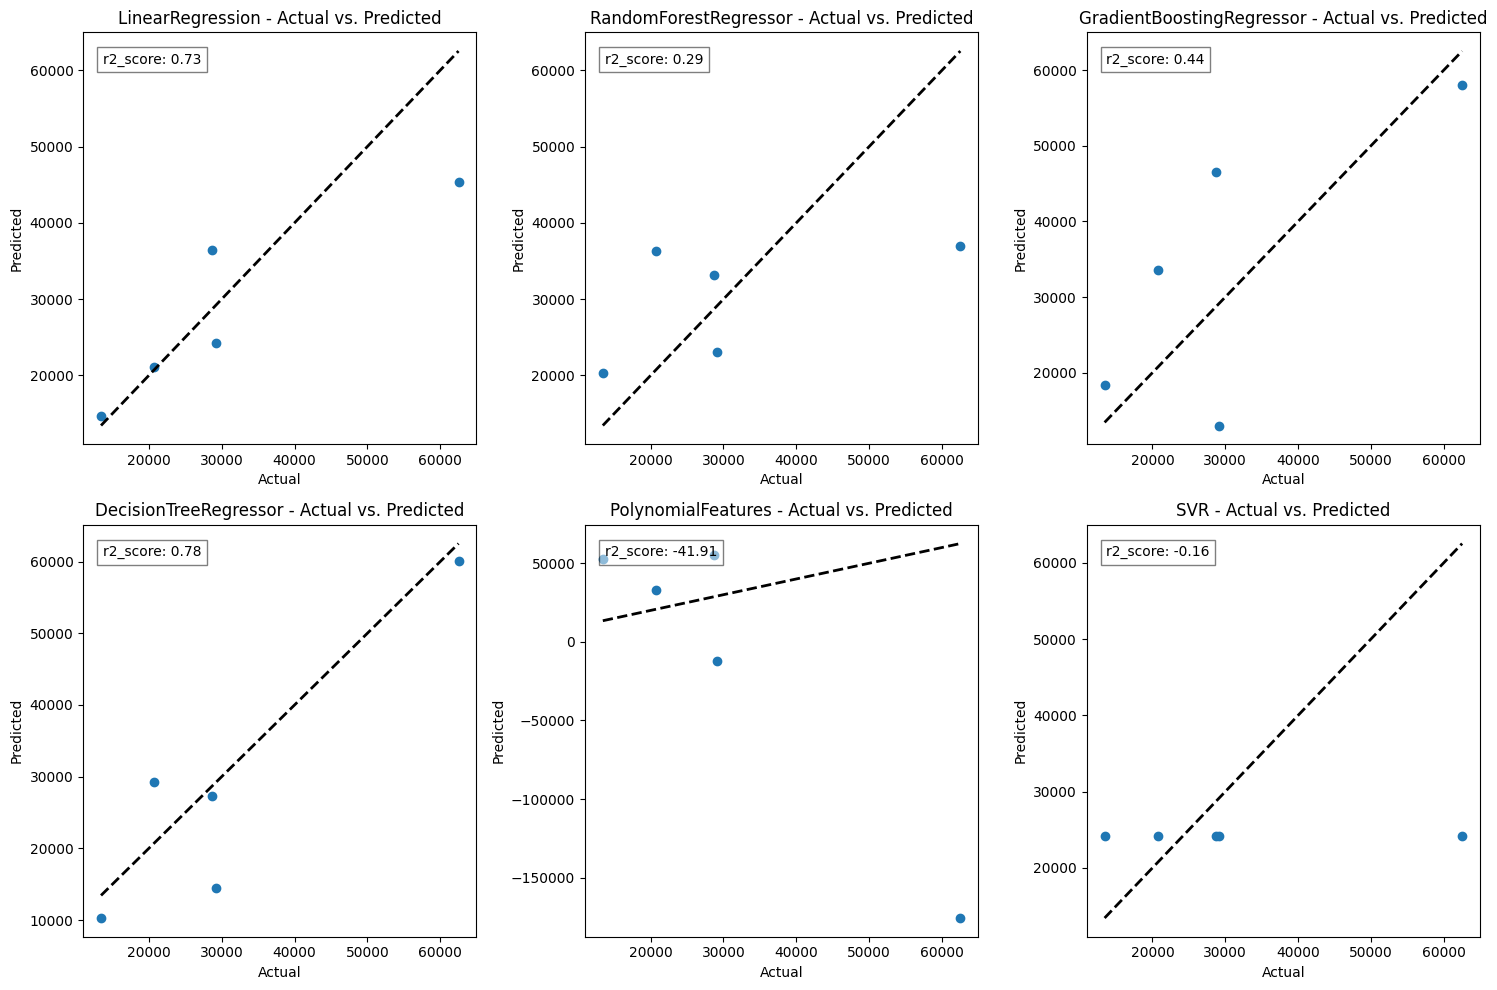

In [ ]:
def plot_predictions(y_true, y_pred, model_name, r2, ax):
    ax.scatter(y_true, y_pred)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_title(f'{model_name} - Actual vs. Predicted')
    ax.text(0.05, 0.95, f'r2_score: {r2:.2f}', transform=ax.transAxes,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

def evaluate_model(X, y, models):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    for model, ax in zip(models, axes.flatten()):
        if isinstance(model, PolynomialFeatures):
            X_train_transformed = model.fit_transform(X_train)
            X_test_transformed = model.transform(X_test)
            model_to_fit = LinearRegression()  # Use a separate variable to avoid overwriting
            model_to_fit.fit(X_train_transformed, y_train)
            y_pred = model_to_fit.predict(X_test_transformed)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        print(f"r2_score {model.__class__.__name__}:", r2)

        plot_predictions(y_test, y_pred, model.__class__.__name__, r2, ax)

    # Menonaktifkan sumbu untuk subplot yang tidak digunakan
    for i in range(len(models), len(axes.flatten())):
        axes.flatten()[i].axis('off')

    plt.tight_layout()
    plt.show()

# Misalkan X_normalized dan y sudah tersedia
evaluate_model(X, y, models)
